In [2]:
import pandas as pd
df = pd.read_csv("C:/ML/data/train.csv")
print(df.shape)
df.head()


(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load Titanic data
df = pd.read_csv("C:/ML/data/train.csv")

# Handle missing values
df = df.fillna(df.mean(numeric_only=True))  # Fill numeric NaN with mean
df = df.fillna("Unknown")                   # Fill non-numeric NaN with "Unknown"

# Encode categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Split into features (X) and target (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split into training/testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

df.info()  # Check: now all columns should be numeric


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int64  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 83.7 KB


Train-Test Split Practice

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of Training Data:", X_train.shape)
print("Shape of Testing Data:", X_test.shape)
print("Train Survival Rate:", y_train.mean())
print("Test Survival Rate:", y_test.mean())


Shape of Training Data: (712, 11)
Shape of Testing Data: (179, 11)
Train Survival Rate: 0.37640449438202245
Test Survival Rate: 0.4134078212290503


In [6]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

print("✅ Model Trained Successfully!")


✅ Model Trained Successfully!


c:\Users\gpssi\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("🔹 Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\n🔹 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))


🔹 Accuracy: 0.816

🔹 Confusion Matrix:
 [[89 16]
 [17 57]]

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



Confusion matrix

🔹 Accuracy: 0.816


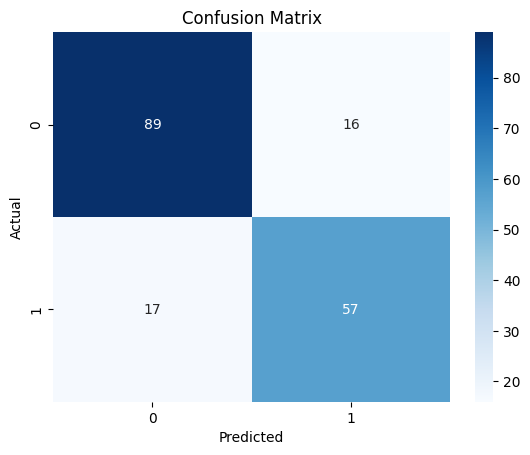


🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("🔹 Accuracy:", round(acc, 3))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))


🧾 Model Evaluation Summary (Titanic – Logistic Regression)

The Logistic Regression model achieved an overall accuracy of ~81% on the Titanic test dataset.
The classification report indicates that the model performs reasonably well in distinguishing between survivors (1) and non-survivors (0).
Specifically, it demonstrates a precision of about 78% and a recall of around 66% for the survivor class, resulting in an F1-score of ~0.71.
This suggests that while the model is generally reliable, it tends to miss a few actual survivors (false negatives).
Overall, the results indicate that the model has learned meaningful relationships between passenger characteristics — such as sex, age, fare, and class — and survival probability.
Future improvements could include feature scaling, tuning model parameters, or testing ensemble methods like Random Forests to further boost predictive performance.